In [1]:
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection
from summaries import summarize_doc, summarize_doc_nmf

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [2]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description ILIKE('%REQUIREMENTS%');
        """
doc_ids, corpus_full = get_query_corpus(query, True)
# corpus = np.array([extract_requirements(doc) for doc in corpus_full])
corpus = corpus_full

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8851 documents loaded!


In [3]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
# tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

Loading ../output/CountVectorizer.pkl from cache...
 -> ../output/CountVectorizer.pkl loaded!
Loading ../output/TfidfTransformer.pkl from cache...
 -> ../output/TfidfTransformer.pkl loaded!


In [4]:
nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max(axis = 0)
W_normalized = W / W_max

Loading ../output/NMF.pkl from cache...
 -> ../output/NMF.pkl loaded!


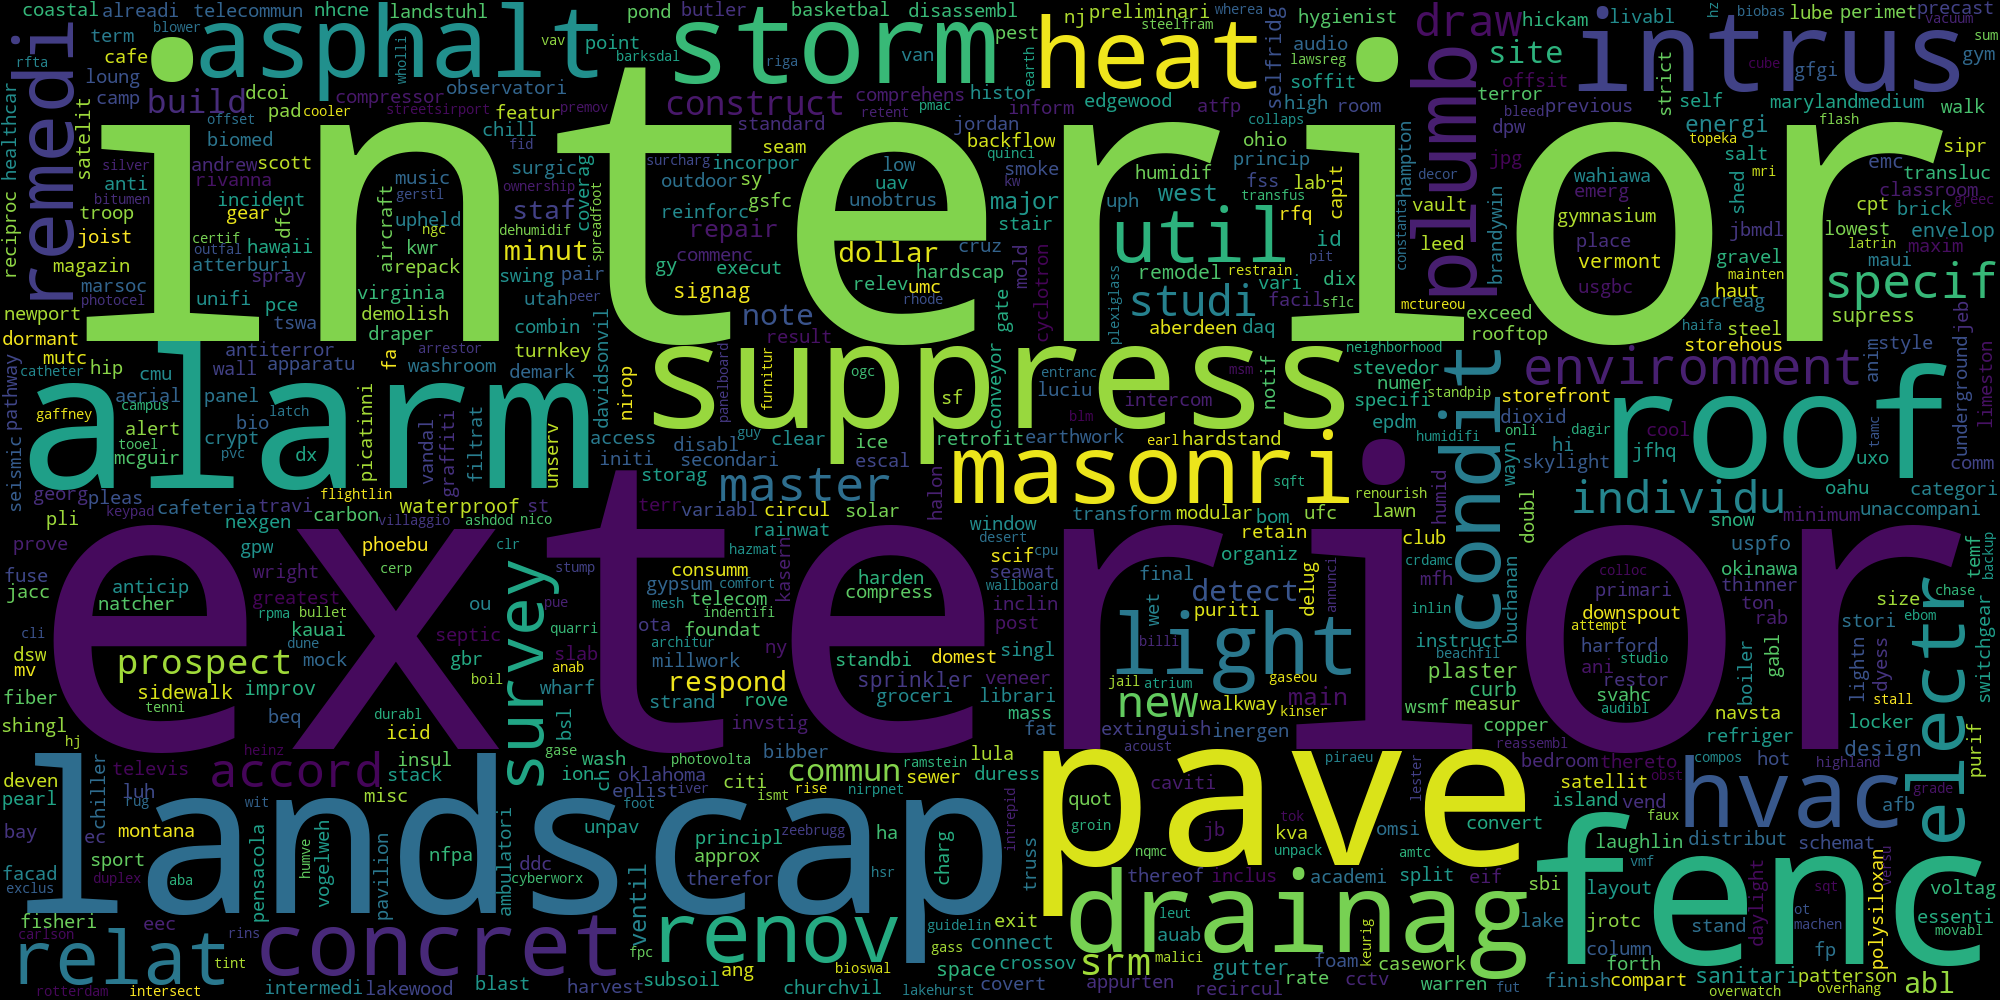

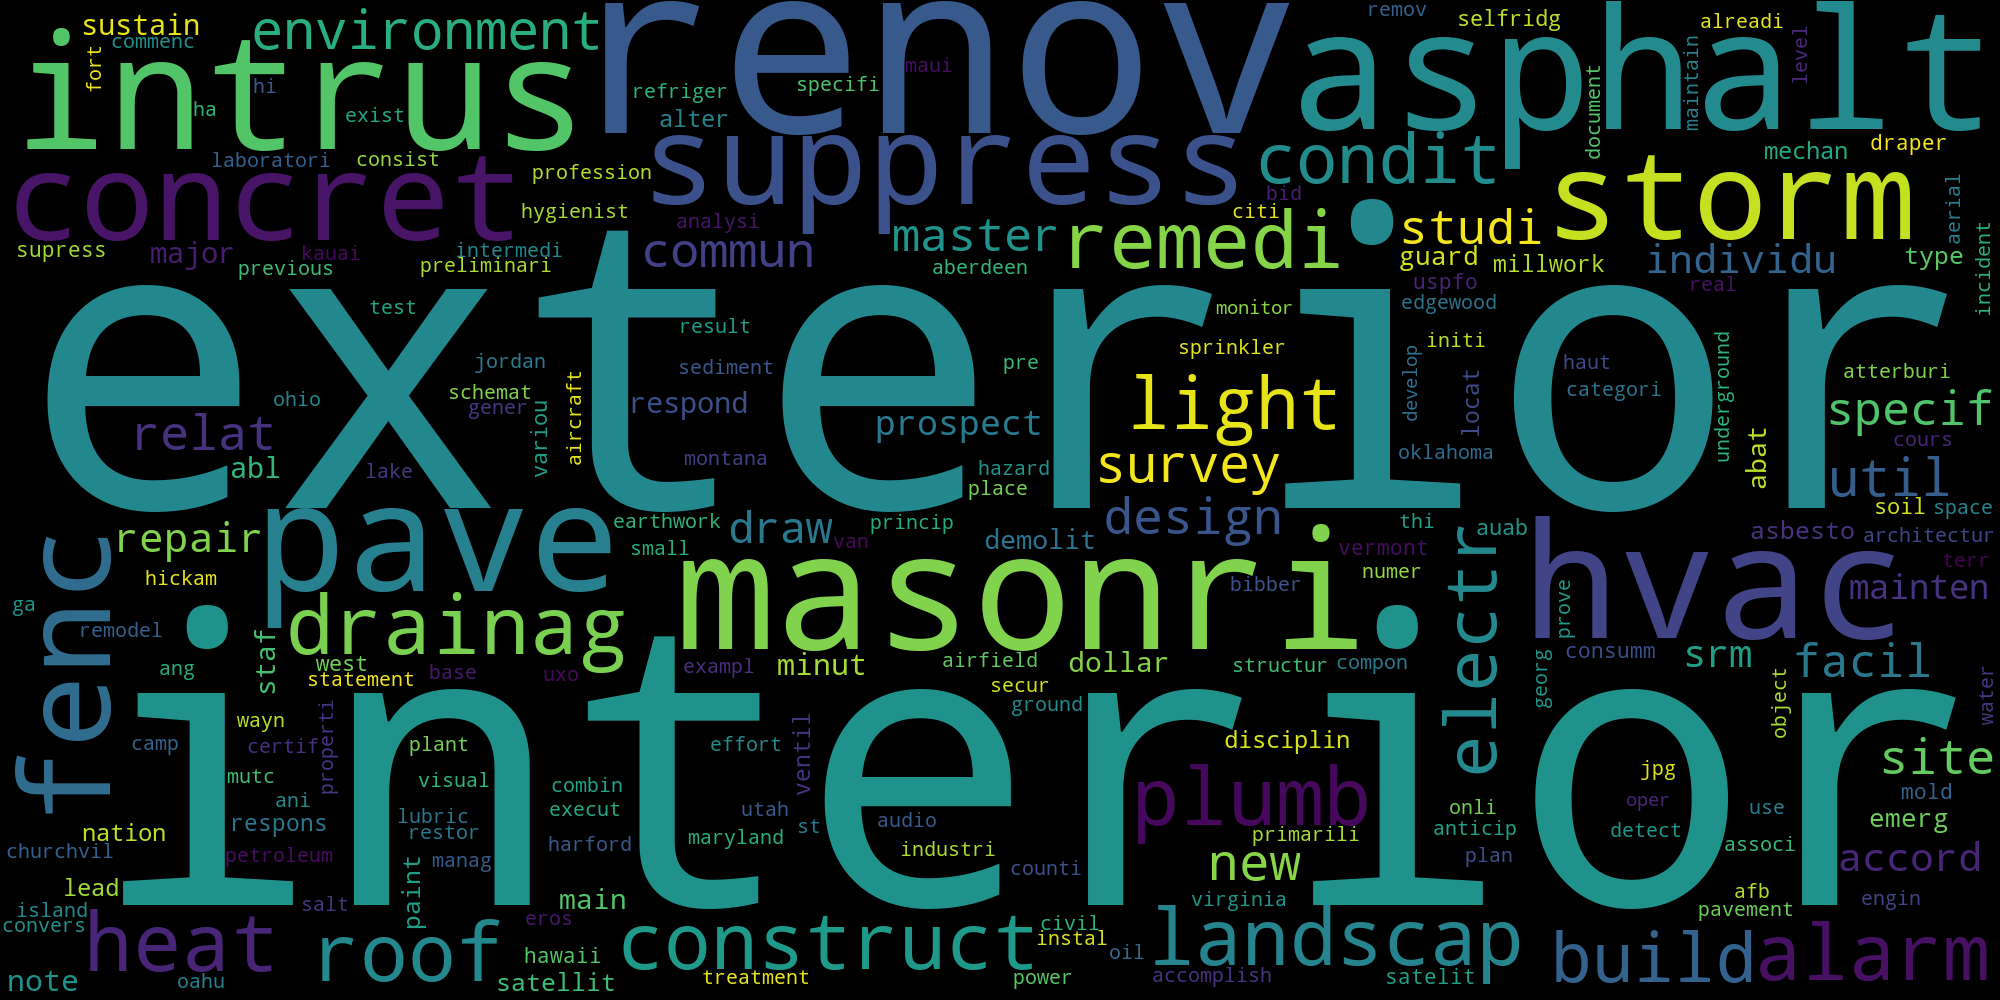

*************************************************************
129454 -> STRENGTH: 1.0 (0.0742)
The Department of the Army, National Guard Bureau (NGB), may have a continuing requirement for construction services in the state of Mississippi

PREVIOUS REQUIREMENTS:
Typical work includes, but is not limited to:
Interior and exterior renovations
Heating and air-conditioning
HVAC controls
Plumbing
Fire suppression
Interior and exterior electrical and lighting
Fire and intrusion alarms
Communications
Limited utilities
Site-work
Landscaping
Fencing
Masonry,
Roofing
Concrete
Asphalt paving
Storm drainage
Limited environmental remediation
Construction of new facilities
Surveys
Studies
Design-build
Other related work

*************************************************************
104480 -> STRENGTH: 0.94 (0.0698)
The Department of the Army, Army National Guard may have an ongoing requirement for multiple IDIQ contracts to accomplish as task orders, a broad range of maintenance, repair and constru

The Department of the Army, National Guard Bureau (NGB),
Nebraska
Army National Guard (NEARNG) has an ongoing requirement for an Indefinite Delivery-Indefinite Quantity (IDIQ) Multiple Award Task Order Contracts (MATOC) for maintenance, repair, construction and design-build services at 3 different locations: 1) Lincoln ANG Base, Lincoln, NE, 2) Mead & Ashland Training Site, Ashland & Mead, NE; and/or 3) Greenlief Training Site, Hastings, NE

REQUIREMENTS:
Typical work includes, but is not be limited to:
Interior and exterior renovations
Heating and air-conditioning
HVAC controls
Plumbing
Fire suppression
Interior and exterior electrical and lighting
Fire and intrusion alarms
Communications
Limited utilities
Site-work
Landscaping
Fencing
Masonry
Roofing
Concrete
Asphalt paving
Storm drainage
Limited environmental remediation
Construction of new facilities
Surveys, studies, design-build and other related work



In [8]:
topic_i = 31

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))

for doc, strength in get_top_10_docs(W_normalized, topic_i):
    print("*************************************************************")
    print(doc_ids[doc], "-> STRENGTH:", round(strength, 2), f"({round(W[doc, topic_i], 4)})")
    print(summarize_doc_nmf(corpus[doc], tfidf, nmf, topic_i, n_sentences=2))
    #print(summarize_doc(doc))
    print()

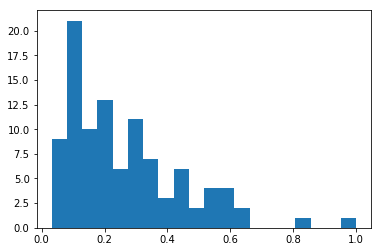

In [6]:
topic_strengths = W.max(axis=0) / W.max()
_ = plt.hist(topic_strengths, bins=20)
# for i, strength in enumerate(W.max(axis=0) / W.max()):
#     print(str(i).rjust(2, "0"), "->", str(round(strength, 2)).ljust(4, "0"))

In [7]:
W.max()

0.3602325586188472